In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import scipy.fft as fft
import scipy.signal as signal

## Injecting signals into noise backgrounds

In [3]:
name = [ 'w_GW150914a',
         'w_GW150914',
         'w_GW150914b',
         'w_GW150914x',
         'w_GW150914c',
         'w_GW150914c1',
         'w_GW150914d',
         'w_GW150914e',
         'w_GW150914f',
         'w_GW150914g' ]


filenames = [f"{n}.txt" for n in name]

nSignals = len(name)

# Load the signals
data = np.array([np.loadtxt(f) for f in filenames])

wLength = len(data[0])

print("Number of signals:", nSignals)
print("Whitened signal sample size:", wLength)

Number of signals: 10
Whitened signal sample size: 40000


In [6]:
# time
t = np.linspace(-4, 0, wLength)
time_step = t[1]-t[0]
print(f"time step: {time_step:.3e}")

time step: 1.000e-04


In [7]:
# bkgs
N = 100
bkgs = np.random.randn(N, wLength)

noisySignals = np.array([
    np.add(bkgs[i], data[j]) for j in range(nSignals) for i in range(N)])

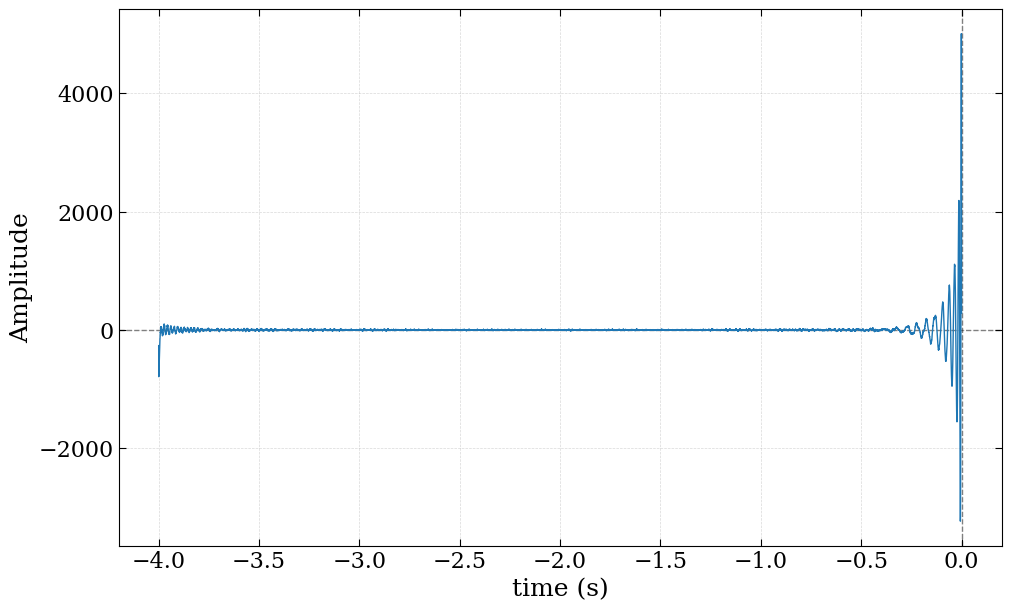

In [8]:
# noisy signal plot

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family']      = 'serif'

fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)

# grid
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.3) 
ax.set_axisbelow(True)

# plot
ax.plot(t, noisySignals[9], color='tab:blue', linewidth=1, zorder=1)


# reference lines
ax.axhline(y=0, color='black', linewidth=1, linestyle='--', alpha=0.5, zorder=0)
ax.axvline(x=0, color='black', linewidth=1, linestyle='--', alpha=0.5, zorder=0)

# labels 
ax.set_xlabel('time (s)', fontdict={'fontfamily':'serif', 'fontsize':18})
ax.set_ylabel('Amplitude', fontdict={'fontfamily':'serif', 'fontsize':18})
# ax.set_title('Noisy signal', fontdict={'fontfamily':'serif', 'fontsize':16})

# ticks 
ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, size=5, labelsize=16)

# display 
plt.show()

## Matches

In [9]:
# selecting 99% of the energy of the whitened signal
w0 = np.where(t > -0.4, data[0], 0)
# norm
n0 = np.linalg.norm(w0)

w0a = np.where(t > -0.4, (data[1]), 0)
n0a = np.linalg.norm(w0a)

w0b = np.where(t > -0.4, (data[2]), 0)
n0b = np.linalg.norm(w0b)

w0x = np.where(t > -0.4, (data[3]), 0)
n0x = np.linalg.norm(w0x)

w0c = np.where(t > -0.4, (data[4]), 0)
n0c = np.linalg.norm(w0c)

w0c1 = np.where(t > -0.4, (data[5]), 0)
n0c1 = np.linalg.norm(w0c1)

w0d = np.where(t > -0.4, (data[6]), 0)
n0d = np.linalg.norm(w0d)

w0e = np.where(t > -0.4, (data[7]), 0)
n0e = np.linalg.norm(w0e)

w0f = np.where(t > -0.4, (data[8]), 0)
n0f = np.linalg.norm(w0f)

w0g = np.where(t > -0.4, (data[9]), 0)
n0g = np.linalg.norm(w0g)

In [10]:
m0 = noisySignals[0:100]
m0a = noisySignals[100:200]
m0b = noisySignals[200:300]
m0x = noisySignals[300:400]
m0c = noisySignals[400:500]
m0c1 = noisySignals[500:600]
m0d = noisySignals[600:700]
m0e = noisySignals[700:800]
m0f = noisySignals[800:900]
m0g = noisySignals[900:1000]

wn0 = np.where(t > -0.4, m0, 0)
wn0a = np.where(t > -0.4, m0a, 0)
wn0b = np.where(t > -0.4, m0b, 0)
wn0x = np.where(t > -0.4, m0x, 0)
wn0c = np.where(t > -0.4, m0c, 0)
wn0c1 = np.where(t > -0.4, m0c1, 0)
wn0d = np.where(t > -0.4, m0d, 0)
wn0e = np.where(t > -0.4, m0e, 0)
wn0f = np.where(t > -0.4, m0f, 0)
wn0g = np.where(t > -0.4, m0g, 0)

nn0 = np.linalg.norm(wn0, axis=1)
nn0a = np.linalg.norm(wn0a, axis=1)
nn0b = np.linalg.norm(wn0b, axis=1)
nn0x = np.linalg.norm(wn0x, axis=1)
nn0c = np.linalg.norm(wn0c, axis=1)
nn0c1 = np.linalg.norm(wn0c1, axis=1)
nn0d = np.linalg.norm(wn0d, axis=1)
nn0e = np.linalg.norm(wn0e, axis=1)
nn0f = np.linalg.norm(wn0f, axis=1)
nn0g = np.linalg.norm(wn0g, axis=1)

In [11]:
# matches
match0 = np.array([ np.dot(w0, wn0[i])/(n0*nn0[i]) for i in range(0,100) ])
mean0 = np.mean(match0)
err0 = np.std(match0)

match0a = np.array([ np.dot(w0a, wn0a[i])/(n0a*nn0a[i]) for i in range(0,100) ])
mean0a = np.mean(match0a)
err0a = np.std(match0a)

match0b = np.array([ np.dot(w0b, wn0b[i])/(n0b*nn0b[i]) for i in range(0,100) ])
mean0b = np.mean(match0b)
err0b = np.std(match0b)

match0x = np.array([ np.dot(w0x, wn0x[i])/(n0x*nn0x[i]) for i in range(0,100) ])
mean0x = np.mean(match0x)
err0x = np.std(match0x)

match0c = np.array([ np.dot(w0c, wn0c[i])/(n0c*nn0c[i]) for i in range(0,100) ])
mean0c = np.mean(match0c)
err0c = np.std(match0c)

match0c1 = np.array([ np.dot(w0c1, wn0c1[i])/(n0c1*nn0c1[i]) for i in range(0,100) ])
mean0c1 = np.mean(match0c1)
err0c1 = np.std(match0c1)

match0d = np.array([ np.dot(w0d, wn0d[i])/(n0d*nn0d[i]) for i in range(0,100) ])
mean0d = np.mean(match0d)
err0d = np.std(match0d)

match0e = np.array([ np.dot(w0e, wn0e[i])/(n0e*nn0e[i]) for i in range(0,100) ])
mean0e = np.mean(match0e)
err0e = np.std(match0e)

match0f = np.array([ np.dot(w0f, wn0f[i])/(n0f*nn0f[i]) for i in range(0,100) ])
mean0f = np.mean(match0f)
err0f = np.std(match0f)

match0g = np.array([ np.dot(w0g, wn0g[i])/(n0g*nn0g[i]) for i in range(0,100) ])
mean0g = np.mean(match0g)
err0g = np.std(match0g)

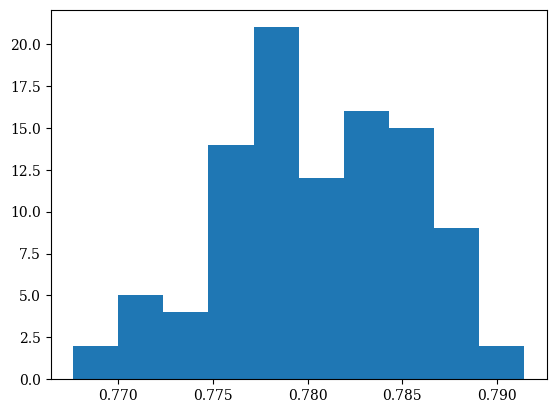

In [12]:
plt.hist(match0x)

plt.show()

In [13]:
means = np.array([mean0, mean0a, mean0b, mean0x, mean0c, mean0c1, mean0d, mean0e, mean0f, mean0g])

errs = np.array([err0, err0a, err0b, err0x, err0c, err0c1, err0d, err0e, err0f, err0g])

In [55]:
# import matches mean with errors in file
np.savetxt("matches.txt", means)
np.savetxt("matches_errs.txt", errs)